# Regresión Lasso
### Least Absolute Shrinkage and Selection Operator
#### Operador de selección y contracción minima absoluta
##### Example
Creamos un ejemplo con datos sintéticos que incluye muchas variables, pero solo algunas serán realmente relevantes para predecir la variable objetivo. 
+ Se desarrolla el ejemplo en código python en un jupyter notebook en github. 
+ Esto permite destacar cómo la regresión Lasso selecciona automáticamente las variables más importantes, logrando un mejor ajuste cuando hay redundancia o irrelevancia en las variables.

Modelos aplicados:
+ Regresión lineal múltiple: Considera todas las variables, sin penalización.
+ Ridge: Penaliza grandes coeficientes para reducir el sobreajuste, pero no elimina variables irrelevantes.
+ Lasso: Selecciona automáticamente las variables más importantes aplicando una penalización L1L_1L1​, lo que lleva a que algunos coeficientes sean exactamente cero.


######

Mean Squared Error:
Linear Regression: 5.0936
Ridge Regression: 5.3334
Lasso Regression: 3.9986

Coeficientes seleccionados por cada modelo:
Linear Regression: [ 9.68994237e+00 -5.32687987e+00  2.76699204e+00  6.80919194e+00
 -7.70049802e+00  2.48150756e-02 -2.23550848e-01  7.56741071e-03
 -3.35156071e-02  6.36247120e-02 -2.28135347e-01  6.91315962e-02
  2.58803558e-01  2.17737539e-01  1.55951648e-01 -2.44415589e-02
  4.43609196e-02  8.48240880e-02 -6.44745009e-02 -9.19960768e-03
  4.93448971e-01 -2.32186823e-01 -2.66499942e-01  2.08432178e-01
  2.12469900e-02 -1.49878173e-01  1.51233253e-01  1.17284632e-01
 -2.09680633e-01  2.83249648e-03 -2.40416681e-01 -6.91401909e-02
 -2.04166709e-01  2.39404384e-01 -1.58401572e-01  5.80231812e-02
  1.46170479e-01 -5.75283168e-02  4.49764342e-01 -3.59785415e-01
 -4.42150273e-02 -2.03146170e-01  3.91474747e-01  2.47332741e-01
 -2.49169606e-01 -5.30693579e-01  1.61496487e-01 -1.86934355e-01
 -2.76447396e-01 -2.69943226e-02]
Ridge Regression: [ 9.6015

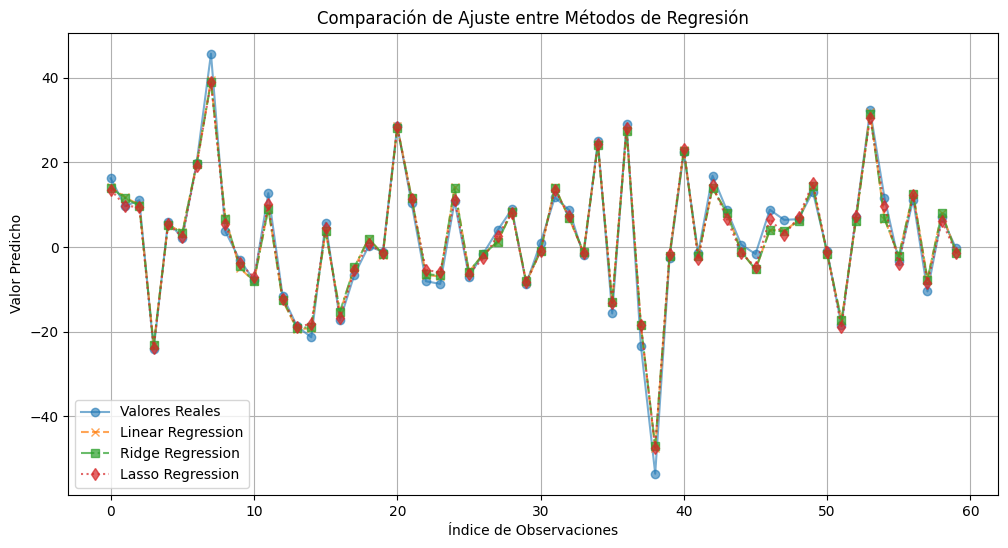

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Configuración inicial
np.random.seed(42)
n_samples = 200
n_features = 50

# Crear un conjunto de datos sintético con muchas variables
X = np.random.randn(n_samples, n_features)

# Solo algunas variables tienen relación con y
true_coefficients = np.zeros(n_features)
true_coefficients[:5] = [10, -5, 3, 7, -8]  # Coeficientes reales no nulos

# Generar la variable objetivo
noise = np.random.randn(n_samples) * 2
y = X @ true_coefficients + noise

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- Modelo de regresión lineal múltiple ----
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# ---- Modelo de regresión Ridge ----
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# ---- Modelo de regresión Lasso ----
lasso_model = Lasso(alpha=0.1)  # Alpha controla la regularización
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Mostrar resultados
print("Mean Squared Error:")
print(f"Linear Regression: {mse_linear:.4f}")
print(f"Ridge Regression: {mse_ridge:.4f}")
print(f"Lasso Regression: {mse_lasso:.4f}")

# Comparar coeficientes
print("\nCoeficientes seleccionados por cada modelo:")
print("Linear Regression:", linear_model.coef_)
print("Ridge Regression:", ridge_model.coef_)
print("Lasso Regression:", lasso_model.coef_)

# Identificar variables seleccionadas por Lasso
selected_features = np.where(lasso_model.coef_ != 0)[0]
print("\nVariables seleccionadas por Lasso:", selected_features)

# ---- Representación gráfica ----
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Valores Reales", linestyle='-', marker='o', alpha=0.6)
plt.plot(y_pred_linear, label="Linear Regression", linestyle='--', marker='x', alpha=0.7)
plt.plot(y_pred_ridge, label="Ridge Regression", linestyle='-.', marker='s', alpha=0.7)
plt.plot(y_pred_lasso, label="Lasso Regression", linestyle=':', marker='d', alpha=0.7)

plt.title("Comparación de Ajuste entre Métodos de Regresión")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Valor Predicho")
plt.legend()
plt.grid(True)
plt.show()


**Interpretación**

Se calcula el error cuadrático medio (MSE) para cada modelo y se comparan los coeficientes. 
+ Lasso debería identificar correctamente las variables relevantes, mostrando el menor MSE.
+ En la grafica correspondiente se observa que si bien ambos métodos trabajan muy parejos en este caso, Lasso temina siendo el que mejor ajusta a los datos de origen.
+ La diferencia se ve aún de manera más precisa al verificar que el MSE para Lasso es el menor.

____________